# <center><b> Machine Learning Project </b></center>
## <center><b> Sentiment Analysis </b></center>

#### Library
Following are the Libraries used in this project
* Pandas
* Numpy
* Tensorflow
* Sk-Learn
* Matplotlib

## Data Sets:
* IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

* Link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = "/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
movie_data = pd.read_csv(data_path)
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movie_data.info()
print(f'Shape of the Data set: {movie_data.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Shape of the Data set: (50000, 2)


In [4]:
movie_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


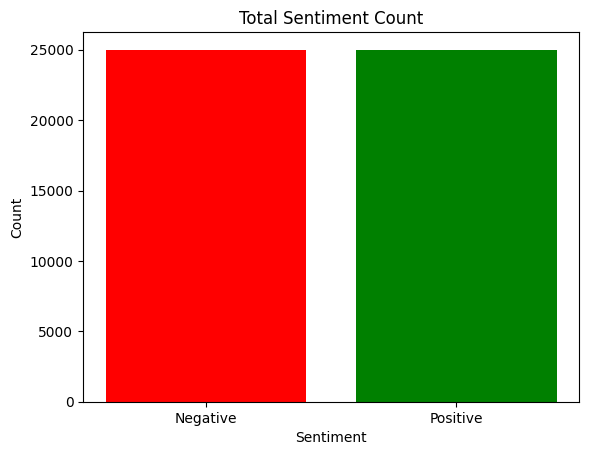

In [5]:
pos_count=len(movie_data[movie_data["sentiment"] == "positive"])
neg_count=len(movie_data[movie_data["sentiment"] == "negative"])
plt.bar(['Negative', 'Positive'], [neg_count, pos_count], color=['Red', 'Green'])
plt.title('Total Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
X=movie_data["review"]
Y=movie_data["sentiment"]
print(f'Shape of X = {X.shape} ')
print(f'Shape of Y = {Y.shape} ')

Shape of X = (50000,) 
Shape of Y = (50000,) 


In [7]:
tokenizer = Tokenizer(
    lower=True,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    oov_token='<OOV>')

In [8]:
texts = X.tolist()
tokenizer.fit_on_texts(texts)
word_index=tokenizer.word_index
seq=tokenizer.texts_to_sequences(texts)
X_padded=pad_sequences(seq,padding='post')

In [9]:
label = LabelBinarizer()
Y_label = label.fit_transform(Y)

In [10]:
Y_label[0:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

In [11]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_padded, Y_label, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [12]:
print(X_train.shape)
print(Y_train.shape)

(35000, 2493)
(35000, 1)


In [13]:
max_length = max(len(seq) for seq in X_padded)
print("Maximum Sequence Length:", max_length)

Maximum Sequence Length: 2493


# Model Description:
1. Embedding Layer:
*     Input Dimension: The size of the vocabulary (vocabulary_size), representing the unique words in your dataset.
*     Output Dimension: 16-dimensional embeddings for each word.
*     Input Length: The maximum length of your input sequences (max_length), ensuring all sequences are of the same length.

2. Global Average Pooling 1D Layer:
*     Performs global average pooling across the sequence dimension, reducing the spatial dimensions.

3. Dense Layers:
* Dense Layer 1: 32 units with ReLU activation function.
* Dense Layer 2: 6 units with Sigmoid activation function.
* Dense Layer 3 (Output Layer): 1 unit with Sigmoid activation function. Outputs a probability indicating the likelihood of positive sentiment.

4. Compilation:
* Optimizer: Adam optimizer is used for training.
* Loss Function: Binary cross-entropy, suitable for binary classification tasks.
* Metrics: Accuracy is used as the evaluation metric.

In [14]:
vocabulary_size = len(word_index) + 1 
model = Sequential([
    Embedding(input_dim=max_length, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2493, 16)          39888     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 40977 (160.07 KB)
Trainable params: 40977 (160.07 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [15]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
1094/1094 [==============================] - 134s 120ms/step - loss: 0.6706 - accuracy: 0.5832 - val_loss: 0.5500 - val_accuracy: 0.7647
Epoch 2/10
1094/1094 [==============================] - 51s 46ms/step - loss: 0.4005 - accuracy: 0.8353 - val_loss: 0.3354 - val_accuracy: 0.8592
Epoch 3/10
1094/1094 [==============================] - 25s 23ms/step - loss: 0.3139 - accuracy: 0.8729 - val_loss: 0.3025 - val_accuracy: 0.8732
Epoch 4/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.2921 - accuracy: 0.8827 - val_loss: 0.3052 - val_accuracy: 0.8715
Epoch 5/10
1094/1094 [==============================] - 16s 14ms/step - loss: 0.2769 - accuracy: 0.8883 - val_loss: 0.2841 - val_accuracy: 0.8835
Epoch 6/10
1094/1094 [==============================] - 11s 10ms/step - loss: 0.2688 - accuracy: 0.8918 - val_loss: 0.3069 - val_accuracy: 0.8696
Epoch 7/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2605 - accuracy: 0.8971 - val_loss: 0.2730

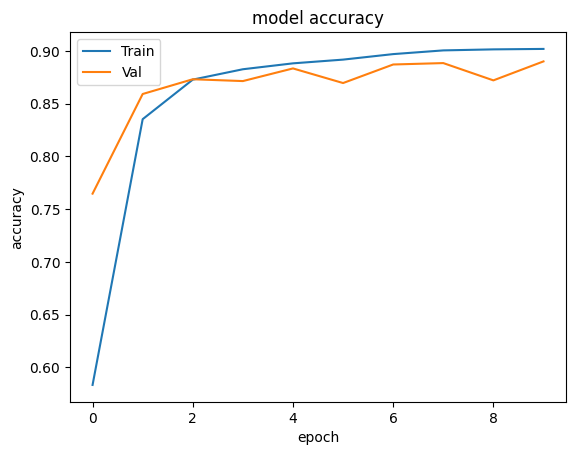

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

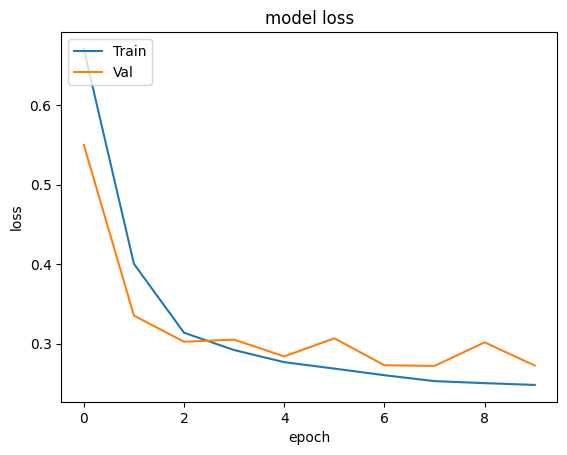

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test,Y_test)

235/235 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.8904


[0.2694191038608551, 0.8903999924659729]

In [19]:
a = "I love this movie, It is the best moive i have ever seen"

# Tokenize and pad the input text
a_sequence = tokenizer.texts_to_sequences([a])
a_padded = pad_sequences(a_sequence, maxlen=max_length, padding='post', truncating='post')

# Predict sentiment
y_hat = model.predict(a_padded)

print(f"Predicted sentiment: {y_hat}")


1/1 [==============================] - 0s 101ms/step
Predicted sentiment: [[0.6910353]]


## Save The Model

In [20]:
# Save the model
model.save('sentiment_analysis_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# Save the tokenizer
import json
tokenizer_json = tokenizer.to_json()
with open('tokenizer_info.json', 'w') as f:
    f.write(tokenizer_json)

## Load The Mode

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json

# Load the model
loaded_model = load_model('sentiment_analysis_model.h5')

# Load the tokenizer
with open('tokenizer_info.json', 'r') as f:
    tokenizer_json = f.read()
    loaded_tokenizer = tokenizer_from_json(tokenizer_json)

In [39]:
def pre(a):
    a_sequence = loaded_tokenizer.texts_to_sequences([a])
    a_padded = pad_sequences(a_sequence, maxlen=max_length, padding='post', truncating='post')
    y_hat = loaded_model.predict(a_padded)
    if y_hat >= 0.5:
        print(f"Predicted sentiment is Positive")
    else:
        print(f"Predicted sentiment is Negative")

user_input=input()
pre(user_input)

 I love this movie. It is the best 


1/1 [==============================] - 0s 20ms/step
Predicted sentiment is Positive
